# Auto-MPG 데이터셋 소개
Auto-MPG 데이터셋은 1970년대 후반과 1980년대 초반에 생산된 자동차의 연비(MPG, Miles Per Gallon)를 예측하는 데 사용되는 대표적인 데이터셋이다. 

## 데이터셋의 구성
Auto-MPG 데이터셋은 다음과 같은 주요 특징들을 포함한다.
- 데이터 수: 398개의 데이터 포인트(레코드)가 있다.
- 변수 수: 총 9개의 변수(컬럼)가 포함되어 있다.

## 변수 설명
| 변수            | 설명                                                                 | 변수 유형            | 비고                       |
|-----------------|----------------------------------------------------------------------|----------------------|----------------------------|
| `mpg`           | 자동차의 연비를 나타낸다. 단위는 Miles per Gallon (MPG)이다.       | 종속 변수 (연속형)   | 예측 목표                   |
| `cylinders`     | 엔진의 실린더 수를 나타낸다.                                         | 범주형 변수           | 정수 값으로 표현 (예: 4, 6, 8) |
| `displacement`  | 엔진의 배기량을 나타낸다. 단위는 cubic inches이다.                   | 연속형 변수           | 실수 값으로 표현            |
| `horsepower`    | 엔진의 마력을 나타낸다. 단위는 horsepower이다.                      | 연속형 변수           | 결측치 포함 가능            |
| `weight`        | 차량의 무게를 나타낸다. 단위는 pounds이다.                           | 연속형 변수           | 실수 값으로 표현            |
| `acceleration`  | 0에서 60마일에 도달하는 데 걸리는 시간을 나타낸다. 단위는 seconds이다. | 연속형 변수           | 실수 값으로 표현            |
| `model year`    | 자동차 모델이 제작된 연도를 나타낸다.                                | 범주형 변수           | 정수 값으로 표현            |
| `origin`        | 자동차 제조국을 나타낸다.                                           | 범주형 변수           | 1: 미국, 2: 유럽, 3: 일본  |
| `car name`      | 자동차의 이름(브랜드 및 모델)을 나타낸다.                            | 문자열 변수           | 고유한 문자열로 표현        |


# Step 1 - 데이터 준비
Auto-MPG의 데이터셋은 모두 9개의 열이 확인되고, 문자열이 포함된 name 열을 제외한 나머지 열은 숫자형으로 추정된다.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/auto-mpg.csv', header=None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# Step 2 - 데이터 탐색
데이터에 대한 기본적인 정보를 확인한다. `info()` 메서드로 데이터의 자료형과 개수를 확인하고, `describe()` 메서드를 실행하여 주요 통계정보를 확인한다.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


숫자형으로 추정되는 열들은 대부분 정수형(`int`)과 실수형(`float`)으로 저장되어 있다. 단, `horsepower` 열의 경우 숫자형이 아닌 문자열(`object`) 타입을 갖는 것을 확인할 수 있다. 

이 부분에 대해서는 추가 확인이 필요하다. 데이터 개수는 398행이고, 모든 열에 유효한(결측값이 아닌) 데이터의 수가 398개씩 확인된다. 

요약 통계를 보면 숫자형 변수들에 대해서만 정리되는 것을 알 수 있다. 각 열을 구성하는 데이터의 중심 경향(`mean`, `50% median`)을 확인하고, 최소값(`min`)과 최대값(`max`)의 범위를 통해 이상치(`outlier`)를 탐색한다.

In [8]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


`isnull()` 메서드를 사용하면 각 원소의 누락 데이터 여부를 True, False로 판정한다. 여기서 `sum()` 메서드로 각 열의 부분합을 계산하여 True 값의 개수를 파악할 수 있다.
결과를 통해 모든 열에 결측치가 없음을 알 수 있다.

In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

`duplicated()` 메서드를 사용하면 각 행에 대해서 중복되는 행이 있는지 여부를 `True`, `False`로 판정한다. 여기에 `sum()` 메서드로 합계를 계산하면 데이터프레임에서 몇 개의 중복 행이 있는지 알 수 있다.
결과를 통해 데이터셋에 중복 행이 없다는 것을 확인할 수 있다.

In [12]:
df.duplicated().sum()

0

변수들 간의 관계와 분포를 `Seaborn`의 `pairplot()` 함수를 사용해 시각화하여 확인한다. 시각화된 결과에 일부 변수들 사이에서 강한 선형관계가 확인된다. 

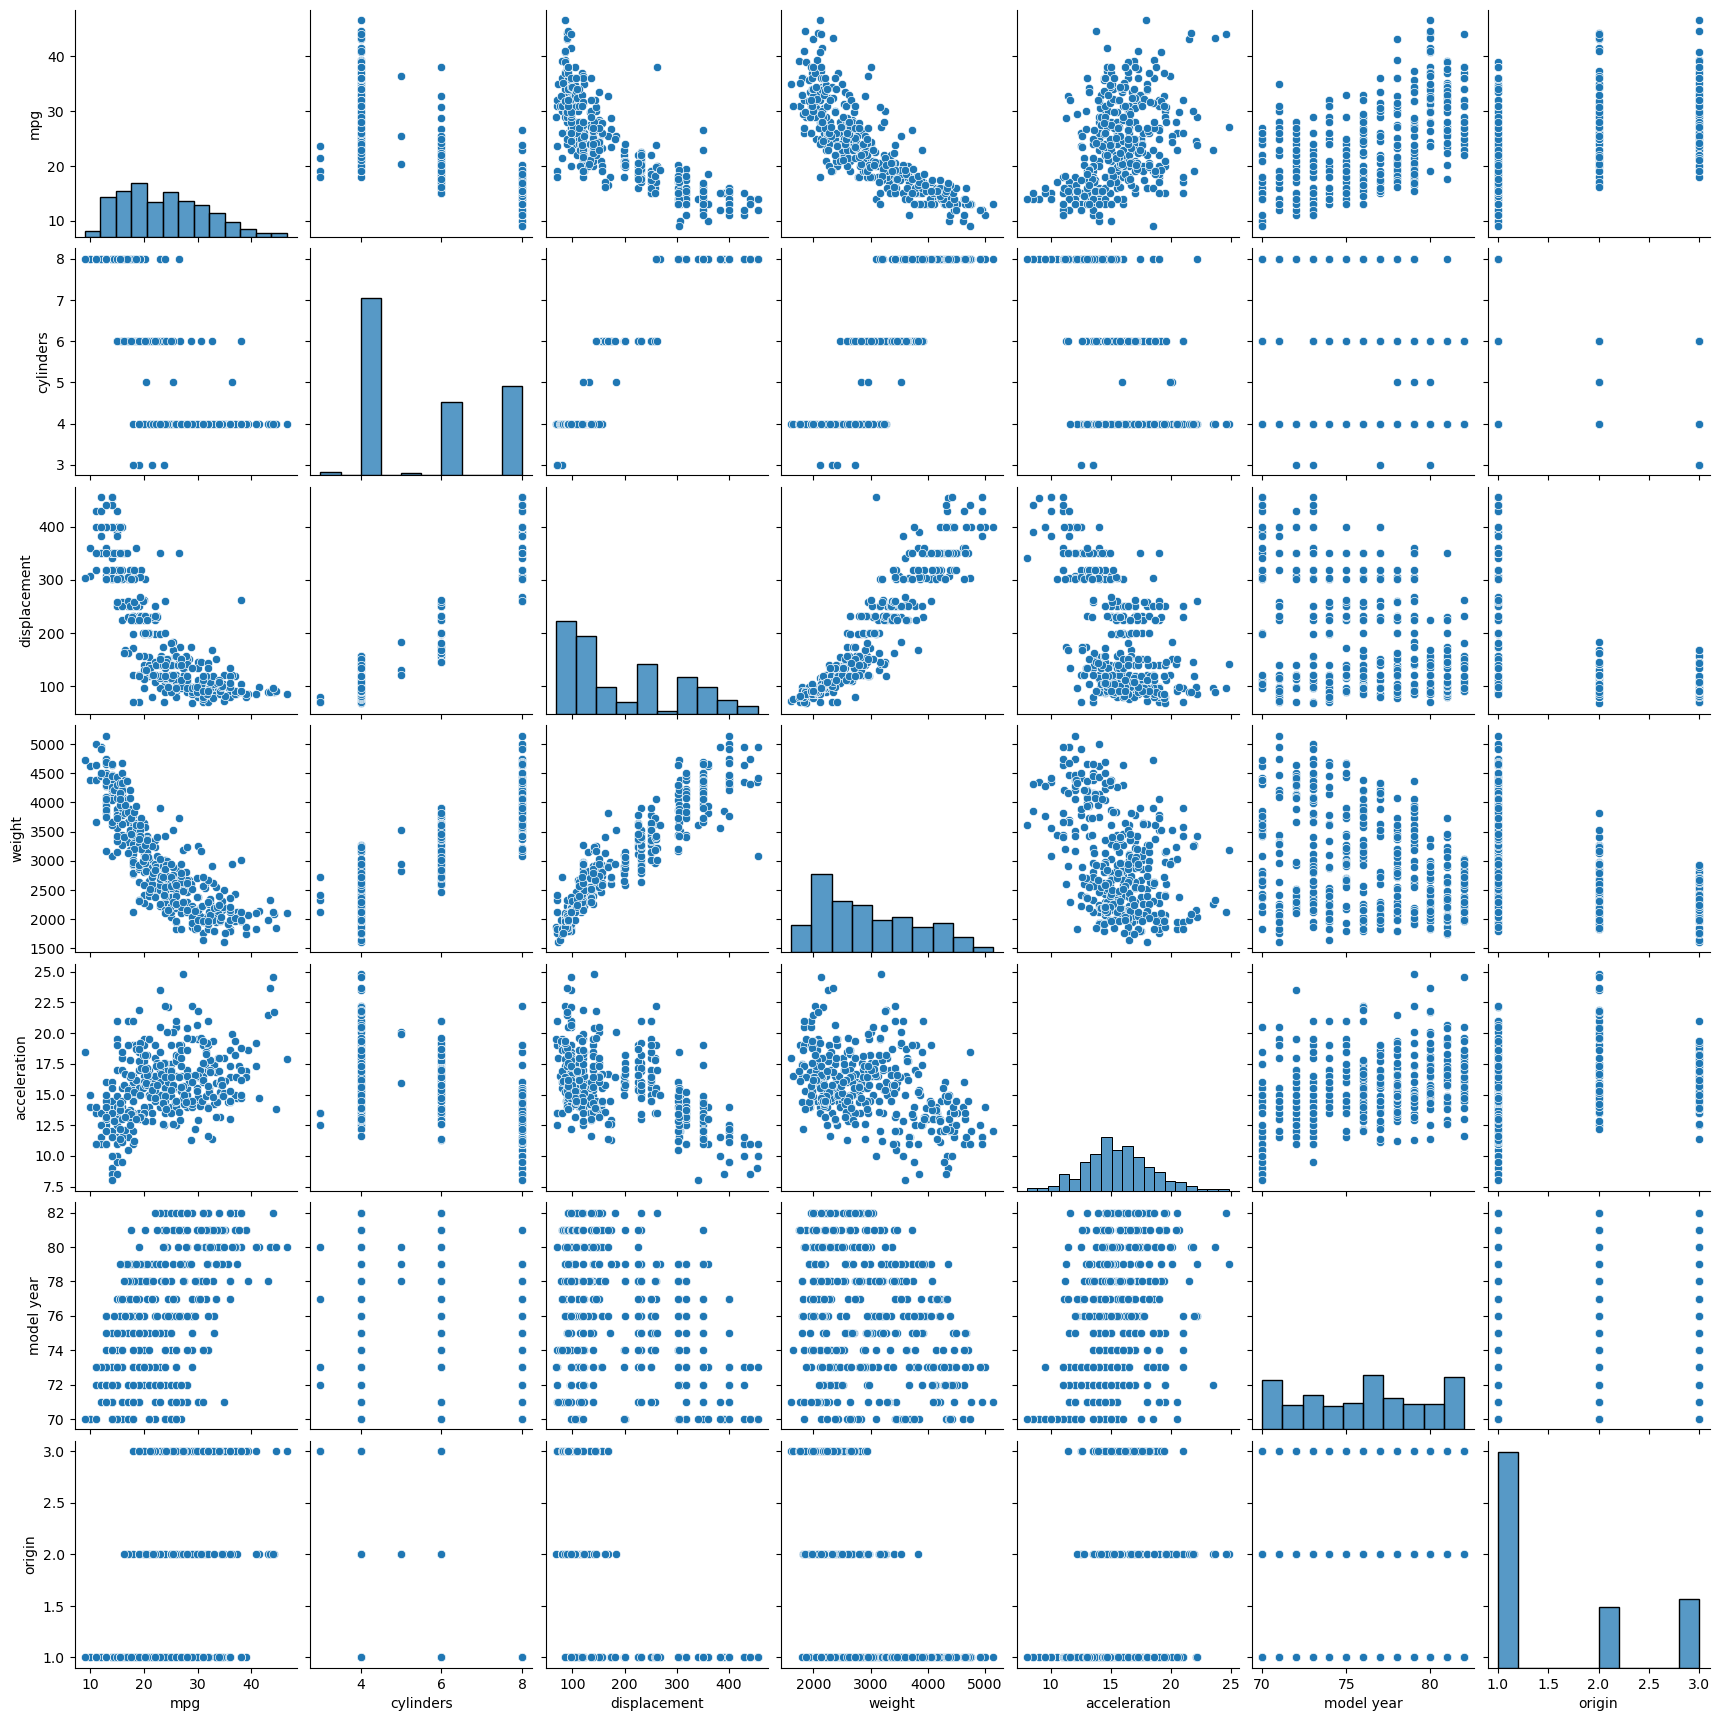

In [17]:
sns.pairplot(df)

구체적인 선형성을 체크하기 위해서 상관계수 표를 생성해서 비교할 필요가 있다.

In [18]:
corr = df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


상관계수 표를 히트앱으로 시각화하면 한눈에 파악하는데 도움이 된다. `displacement` 변수와 `cylinders` 변수의 상관계수가 `0.95`로 가장 크다. 두 변수는 강한 양의 상관관계를 가지고 있다.

</br>

`np.triu(np.ones_like(corr, dtype=bool))`은 `corr`와 동일한 크기의 행렬을 만들되, 이 행렬은 `True`와 `False`로만 구성되며, `True`는 상삼각 부분에만 위치하게 된다.
이 결과는 주로 상관 행렬의 하삼각행렬을 가리는 마스크(mask)를 만들 때 사용된다. 상관 행렬의 경우 대칭 행렬이기 때문에, 상삼각행렬만 분석하거나 시각화하는 것이 효율적일 수 있다.

[[ True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True]
 [False False  True  True  True  True  True]
 [False False False  True  True  True  True]
 [False False False False  True  True  True]
 [False False False False False  True  True]
 [False False False False False False  True]]


<Axes: >

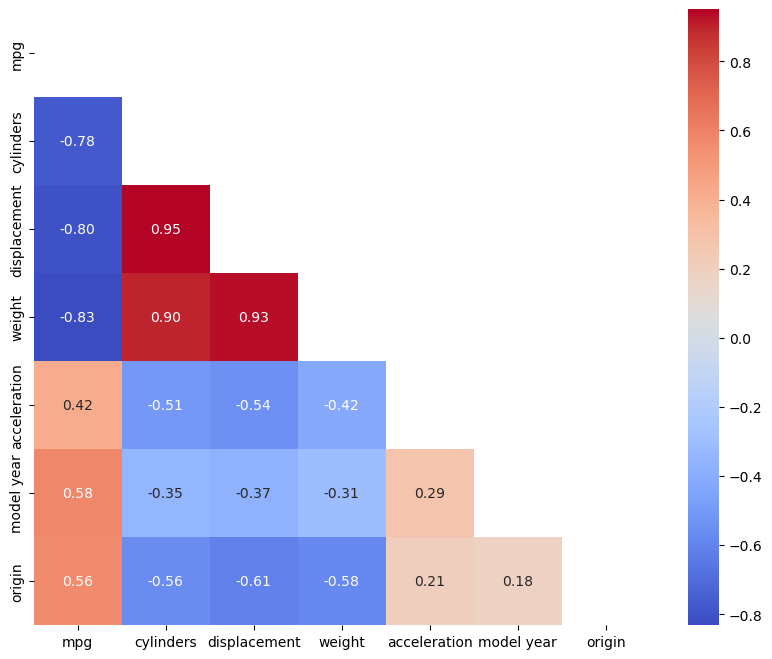

In [20]:
# 마스크 생성 (상단 트라이앵글을 숨김)
mask = np.triu(np.ones_like(corr, dtype=bool))
print(mask)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', cbar=True, square=True)

# Step 3 - 데이터 전처리

엔진 출력을 나타내는 `horsepower` 열의 자료형이 문자열(`object`)이므로, 숫자형으로 변경할 필요가 있다. `horsepower` 열의 고유값을 출력해보면 숫자가 아닌 `?` 문자열이 포함되어 있다. 이 데이터 때문에 해당 열이 숫자형이 아닌 문자열로 저장된 것으로 보인다.

In [21]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

`horsepower` 열의 자료형을 숫자형으로 바꾸지 위해, `horsepower` 열의 고유값 중에서 누락 데이터를 뜻하는 ? 문자열을 누락 데이터(`np.nan`)로 변경하고 `astype()` 메서드를 사용하여 실수형으로 변환한다.

</br>

`describe()` 메서드로 확인해보면 `horsepower` 열이 포함되는 것을 확인할 수 있다.

In [22]:
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype('float')

df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


`horsepower` 열에 결측치가 포함되어 있기 때문에 이를 데이터셋에서 제거해야 한다. 대부분의 머신러닝 알고리즘은 결측치를 처리하지 못하고 오류를 발생시키기 때문이다. 
</br>

머신러닝 데이터 분석에서 결측치를 처리하는 방법은 크게 두 가지가 있다. 먼저, 누락 데이터가 포함된 행을 찾아서 제거하는 방법이다. `dropna()` 메서드를 사용하여 결측치가 포함된 행을 삭제한다.

In [24]:
print(df['horsepower'].isnull().sum())

df_nan = df.dropna(subset=['horsepower'], axis=0)
print(df_nan['horsepower'].isnull().sum())

6
0


두 번째 방법은 적절한 대표값으로 결측치를 채워주는 방법이다. 치환 또는 대치라고 부른다.

</br>

여기서 `horsepower` 열의 데이터들의 평균(`mean`)을 구해서 `fillna()` 메서드를 사용해 해당 값으로 결측치를 채운다.

In [25]:
print(df['horsepower'].isnull().sum())

df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
print(df_nan['horsepower'].isnull().sum())

6
0


평균값으로 결측치를 대치한 데이터프레임 `df`를 가지고 다시 상관계수 표를 계산한다. `horsepower` 열이 포함되었고, 차량의 연비 정보를 담고 있는 `mpg` 열과 상관계수가 `-0.77`이다. 이는 음의 상관관계가 높은 것을 의미한다.

In [29]:
corr = df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


<Axes: >

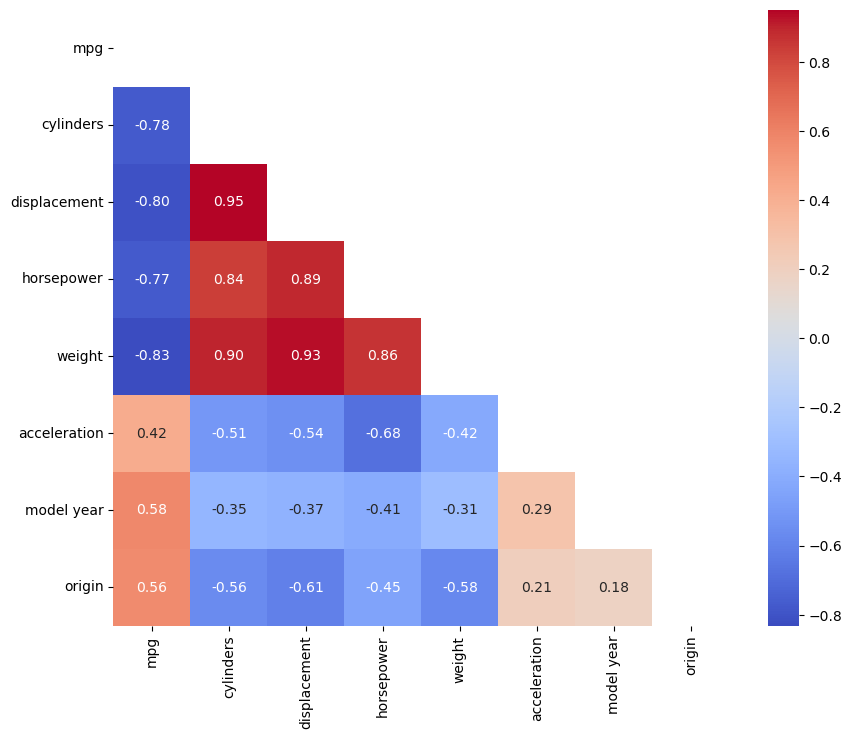

In [30]:
# 마스크 생성 (상단 트라이앵글을 숨김)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', cbar=True, square=True)

# Step 4 - 변수 선택

단순회귀분석에 변수로 사용할 후보 열을 선택한다. 예측 목표인 종속 변수(Y)가 될 `mpg` 열과, 독립 변수(X)로 사용할 후보로 3개의 열(`cylinders`, `horsepower`, `weight`)을 포함한다.

</br>

변수 선택은 일반적으로 과거의 경험과 지식으로 선정하거나, 상관계수가 높은 변수들을 우선 고려할 수도 있다.

In [28]:
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


독립 변수로 고려하고 있는 3개의 후보 열 중에서 단순회귀분석에 사용할 독립 변수를 하나 선택한다. 종속 변수(Y)와 독립 변수(X) 간의 일대일 관계를 찾는 것이므로, 두 변수 간의 선형관계가 있는지 그래프를 그려서 확인한다.

</br>

먼저 `plot()` 메서드에 `kind='scatter'` 옵션을 적용하여 산점도를 그린다. x축에는 `weight` 열을 지정하고, y축 데이터로 `mpg` 열을 지정하여 두 변수 간의 상관성을 확인한다.

<Axes: xlabel='weight', ylabel='mpg'>

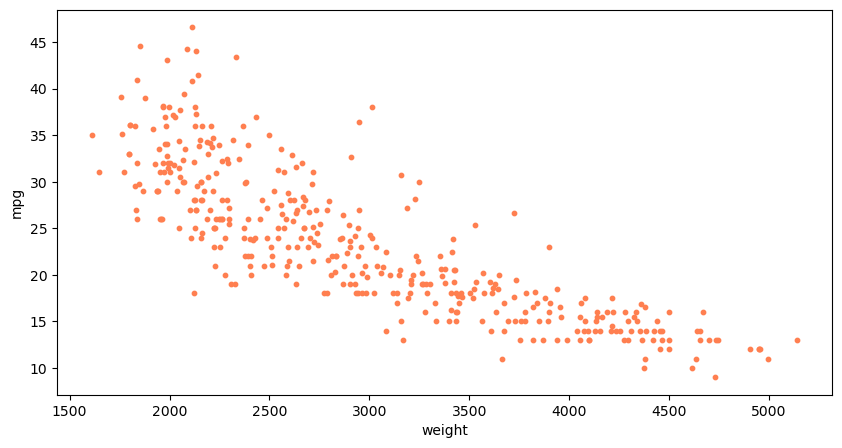

In [32]:
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))

x축에는 `cylinders` 열을 지정하고, y축 데이터로 `mpg` 열을 지정하여 두 변수 간의 상관성을 확인한다.

</br>

실린더 수가 많을수록(6 또는 8) 연비가 낮아지는 경향이 있는 것으로 보이고, 반대로, 실린더 수가 적을수록(4) 연비가 높아지는 경향이 있습니다.

<Axes: xlabel='cylinders', ylabel='mpg'>

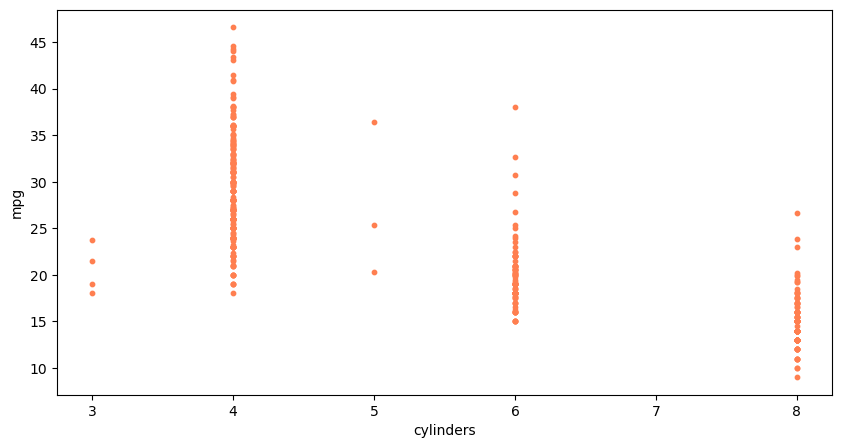

In [33]:
ndf.plot(kind='scatter', x='cylinders', y='mpg', c='coral', s=10, figsize=(10, 5))

x축에는 `horsepower` 열을 지정하고, y축 데이터로 `mpg` 열을 지정하여 두 변수 간의 상관성을 확인한다.
</br>

전반적으로, `horsepower`가 증가할수록 `mpg`가 감소하는 경향이 보인다. 이는 마력이 높은 자동차가 일반적으로 연비가 낮다는 것을 의미한다.

<Axes: xlabel='horsepower', ylabel='mpg'>

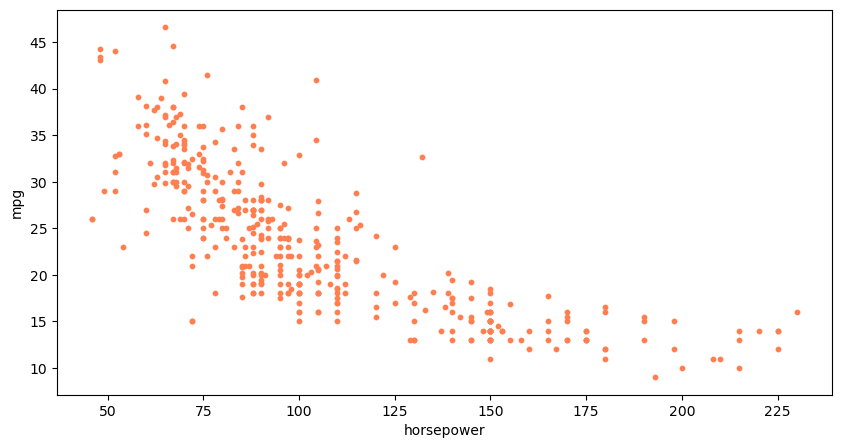

In [35]:
ndf.plot(kind='scatter', x='horsepower', y='mpg', c='coral', s=10, figsize=(10, 5))

`Seaborn` 라이브러리의 `regplot()` 함수를 사용하여 두 변수에 대한 산점도를 그린다. 기본적으로 회귀선을 표시한다. 

<Axes: xlabel='cylinders', ylabel='mpg'>

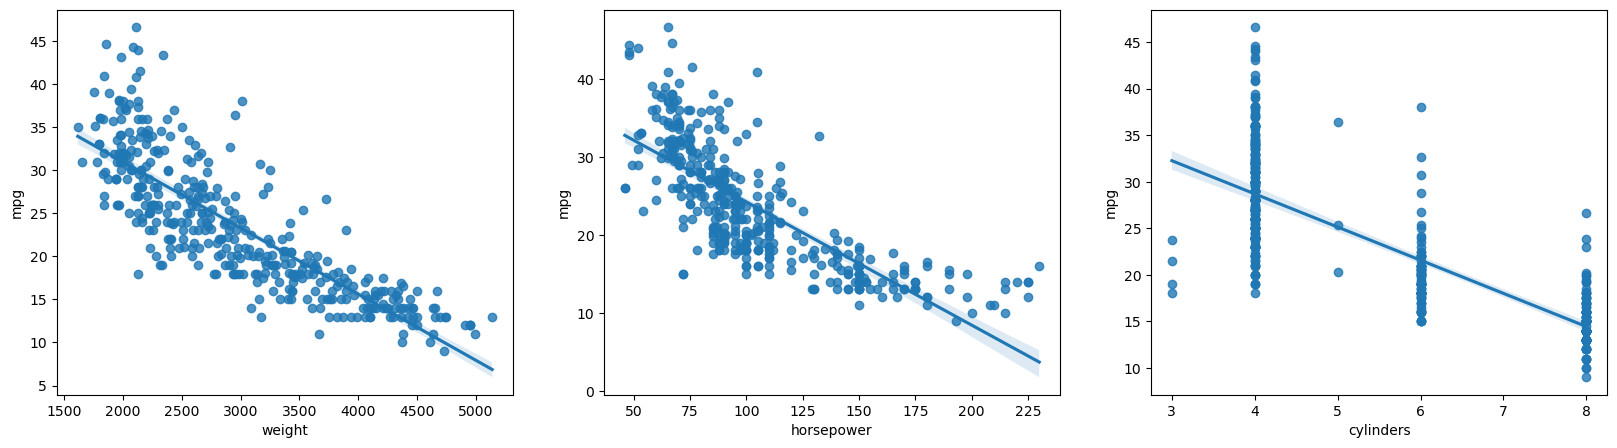

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.regplot(x='weight', y='mpg', data=ndf, ax=axes[0])
sns.regplot(x='horsepower', y='mpg', data=ndf, ax=axes[1])
sns.regplot(x='cylinders', y='mpg', data=ndf, ax=axes[2])

# Step 5 - 훈련/검증 데이터 분할

선형관계를 잘 설명하는 선형회귀 알고리즘을 적용할 예정이므로 목표 변수(Y)인 `mpg` 열과 강한 선형관계를 보이는 `horsepower`, `weight` 열을 설명 변수 X로 선택하는 것을 고려한다.

그 다음은 두 변수 간의 회귀모델을 찾을 차례이다. 훈련 데이터와 검증 데이터로 나눠서 모델의 학습에 사용할 데이터와 모델 성능을 평가할 데이터를 구분한다.

독립 변수 X로 선택하고, 데이터를 7:3 비율로 분할한다.

In [41]:
y = ndf['mpg']

X_weight = ndf[['weight']]
X_horsepower = ndf[['horsepower']]

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split

X_weight_train, X_weight_test, y_weight_train, y_weight_test = train_test_split(X_weight, y, test_size=0.3,
                                                                                random_state=10)
X_horsepower_train, X_horsepower_test, y_horsepower_train, y_horsepower_test = train_test_split(X_horsepower, y,
                                                                                                test_size=0.3,
                                                                                                random_state=10)

print('X_weight_train data 개수: ', len(X_weight_train))
print('X_weight_test data 개수: ', len(X_weight_test))

print('X_horsepower_train data 개수: ', len(X_horsepower_train))
print('X_horsepower_test data 개수: ', len(X_horsepower_test))

X_weight_train data 개수:  278
X_weight_test data 개수:  120
X_horsepower_train data 개수:  278
X_horsepower_test data 개수:  120


# Step 6 - 모델 학습 및 검증

`sklearn` 라이브러리에서 선형회귀분석 모듈을 사용한다. `LinearRegression()` 함수로 회귀분석 모형 객체를 생성하여 변수 `lr`에 저장한다. 모형 객체(`lr`)에 `fit()` 메서드를 적용하고 훈련 데이터(`X_train, y_train`)를 전달하면 모형이 학습을 통해 회귀 방정식의 계수 $a$, $b$를 찾는다.

학습을 마친 모델의 예측 능력을 평가하기 위해 검증 데이터를 `score()` 메서드에 전달하여 `lr` 모델의 결정계수($r^2$)를 구한다. 

**`결정계수`는 회귀 분석에서 종속 변수의 분산 중 독립 변수들에 의해 설명되는 비율을 나타내는 지표이다. 0에서 1 사리의 값을 가지며, 일반적으로 값이 클수록 모델이 데이터를 잘 설명하고 있다고 해석된다.**

**잔차 $e$**

$$
잔차 = 실제값 - 예측값
$$

- 설명
    
    잔차는 어떤데이터 점의 실제 값과 회귀선에서 얻은 예측 값의 차이를 의미한다. 잔차의 절대값은 예측 값에서 데이터 점의 실제 값까지의 거리이다. 
    

**잔차 최소화**

$$
\sum (e_n)^2
$$

- 설명
    
    데이터의 경향을 보여주는 가장 적합한 선(회귀선)을 찾기 위해서는 모든 잔차 값을 최소화해야 한다는 것은 합리적이다. 왜냐하면 각 데이터 포인트에서 가장 회귀선까지의 모든 거리를 최소화할 수 있기 때문이다. 
    잔차를 최소화하기 위해서는 최소제곱을 최소화해야한다. 이 때 잔차 값을 제곱하는 이유는 잔차의 양수와 음수 값이 합쳐져 0에 가까운 값이 되는 것을 방지하기 위해서이다. 제곱을 ㅇ해 음수 값을 제거하고 서로 상쇄되는 것을 방지하여 모든 잔차를 최소화 할 수 있다.
    

**결정 계수**

$$

\sum (e_n)^2
$$

- 설명
    
    $r^2$는 결정 계수이다. 회귀선을 사용하여 제거된 오류의 양을 $r^2$를 이용해서 구한다. 이는 단순히 최소 제곱 회귀를 사용하여 제거된 오류의 백분율을 측정하는 것이다.
    $r^2$는 회귀선이 데이터를 얼마나 잘 근사하는지를 알려준다.
    

**Root-mean-square error(RMSE)**

- 설명
    
    루트 평균 제곱 오차(RMSE)는 잔차의 표준 편차로 생각하면 된다. 최소 제곱 선으로부터 데이터의 표준 편차로 생각할 수 있다.
    최소 제곱선을 찾고, 그 선을 통해 데이터를 스케치했다면, 회귀선으로부터 표준 편차를 나타내는 최소 제곱 선의 양쪽에 평행한 선을 그릴 수 있다. 표준 편차가 매우 크다면, 이러한 선들이 최소 제곱 선으로부터 멀리 떨어져 있음을 나타내어 최소 제곱 선이 데이터를 잘 맞추지 못 한다는 것을 의미한다. 그러나 표준 편차가 매우 작고, 이 선들이 최소 제곱선에 가깝다면, 최소 제곱선이 데이터의 경향을 매우 잘 나타낸다는 의미이다.
    RMSE를 찾으려면 각 데이터 포인트의 잔차를 찾고, 이를 제곱한다. 그 후 모든 제곱 잔차를 더하고, 이를 n으로 나눈다.

In [43]:
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모델 객체 생성
lr1 = LinearRegression()
lr2 = LinearRegression()

# train data를 가지고 모델 학습
lr1.fit(X_horsepower_train, y_weight_train)
lr2.fit(X_weight_train, y_weight_train)

r_square_horsepower = lr1.score(X_horsepower_test, y_horsepower_test)
r_square_weight = lr2.score(X_weight_test, y_weight_test)

print('horsepower R^2 결정계수: ', r_square_horsepower)
print('weight R^2 결정계수: ', r_square_weight)

horsepower R^2 결정계수:  0.5626888553316807
weight R^2 결정계수:  0.689363809315209


회귀선의 관계식을 구성하는 계수(coefficient)인 a와 절편(intercept)인 $b$를 확인할 수 있다. 계수 $a$는 회귀식의 기울기를 나타내고, 모델 객체 `lr`의 `coef_` 속성값이다. 계수 $b$는 y 절편이고, 모델 객체 `lr`의 `intercept_` 속성값이다.

In [44]:
print('기울기 a: ', lr1.coef_)
print('y절편 b', lr1.intercept_)

print('기울기 a: ', lr2.coef_)
print('y절편 b', lr2.intercept_)

기울기 a:  [-0.15796818]
y절편 b 40.26981288518536
기울기 a:  [-0.0076554]
y절편 b 46.60365052224631


모델이 예측한 결과와 실제 값을 비교해보자. 검증 데이터(`X_test`)를 `predict()` 메서드에 입력하면, 모델이 반환하는 예측값을 `y_hat`에 저장한다. 실제 값 `y_test`, 모델 예측값 `y_hat`, 그리고 두 값의 차이(오차)를 제곱하여 계산한 `squared_error` 열을 데이터프레임 `test_preds`에 추가한다. 이를 통해 정답과 예측값을 비교할 수 있다.

In [45]:
# 모델에 test data 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat_of_horsepower = lr1.predict(X_horsepower_test)
y_hat_of_weight = lr2.predict(X_weight_test)

# 오차 계산
test_preds_horsepower = pd.DataFrame(y_horsepower_test)
test_preds_horsepower.columns = ['y_test']
test_preds_horsepower['y_hat'] = y_hat_of_horsepower
test_preds_horsepower['squared_error'] = (test_preds_horsepower['y_hat'] - test_preds_horsepower['y_test']) ** 2

test_preds_weight = pd.DataFrame(y_weight_test)
test_preds_weight.columns = ['y_test']
test_preds_weight['y_hat'] = y_hat_of_weight
test_preds_weight['squared_error'] = (test_preds_weight['y_hat'] - test_preds_weight['y_test']) ** 2

display(test_preds_horsepower)
display(test_preds_weight)



,y_test,y_hat,squared_error
331,33.8,29.685945,16.925448
111,18.0,26.052677,64.845607
350,34.7,30.317818,19.203521
205,28.0,28.422200,0.178253
56,26.0,29.212041,10.317204
...,...,...,...
17,21.0,26.842518,34.135015
225,17.5,22.893313,29.087830
223,15.5,17.364427,3.476089
59,23.0,31.739531,76.379408


,y_test,y_hat,squared_error
331,33.8,30.182824,13.083965
111,18.0,30.343587,152.364137
350,34.7,29.646946,25.533357
205,28.0,30.106270,4.436372
56,26.0,31.637349,31.779704
...,...,...,...
17,21.0,26.799138,33.630001
225,17.5,19.656652,4.651150
223,15.5,14.910306,0.347739
59,23.0,29.348385,40.301995


테스트 데이터들에 대한 제곱 오차의 평균을 구한다. 평균 제곱 오차(MSE:Mean-Square Error)라고 부르는 대표적인 회귀분석 평가 지표이다.

In [46]:
# 평균 제곱 오차
mse_of_horsepower = test_preds_horsepower['squared_error'].mean()
print(f'MSE of horsepower: {mse_of_horsepower}')

mse_of_weight = test_preds_weight['squared_error'].mean()
print(f'MSE of weight: {mse_of_weight}')

MSE of horsepower: 25.197134444868063
MSE of weight: 17.898336128759958


예측 결과를 정리한 데이터프레임을 그래프로 시각화하여 모델의 예측 성능과 오차의 특성을 분석할 수 있다. 이를 바탕으로 모델을 개선할 방향을 찾을 수 있다. `regplot()` 함수로 그린 회귀 플롯은 실제값(`y_test`)와 예측값(`y_hat`) 사이의 관계를 선형 회귀선과 함께 보여준다.

각 데이터 포인트들이 회귀선 주위에 가까이 모여 있을 수록 모델의 예측이 정확하다고 볼 수 있다. 연비가 낮거나 높은 구간에서는 실제값보다 작게 예측하고, 연비가 중간 수준일 때는 실제값보다  크게 예측하는 경항을 보인다.

`kdeplot()` 함수로 그린 컬널 밀도 그래프는 예측 오차의 분포를 시각화한다. 오차의 분포가 정규 분포에 가까울 수록 성능이 좋다고 볼 수 있으며, 특히 오차가 0 주위에 집중되어 있는지 확인하는 것이 중요하다.

대부분 0 주위에 집중되어 있으나, 일 부 샘플에 대해서 오차가 크게 나타나는 이상치가 있는 것을 확인할 수 있다. 이 부분에 대해 성능 개선이 필요하다. 예를 들면, 산점도를 봤을 때 직선 보다는 곡선 형태가 더 접합해 보인다. 

따라서 직선으로 설명하는 단순선형회귀모델이 아닌 곡선을 표현할 수 있는 모델을 사용하는 것을 고려할 수 있다.

<Axes: xlabel='squared_error', ylabel='Density'>

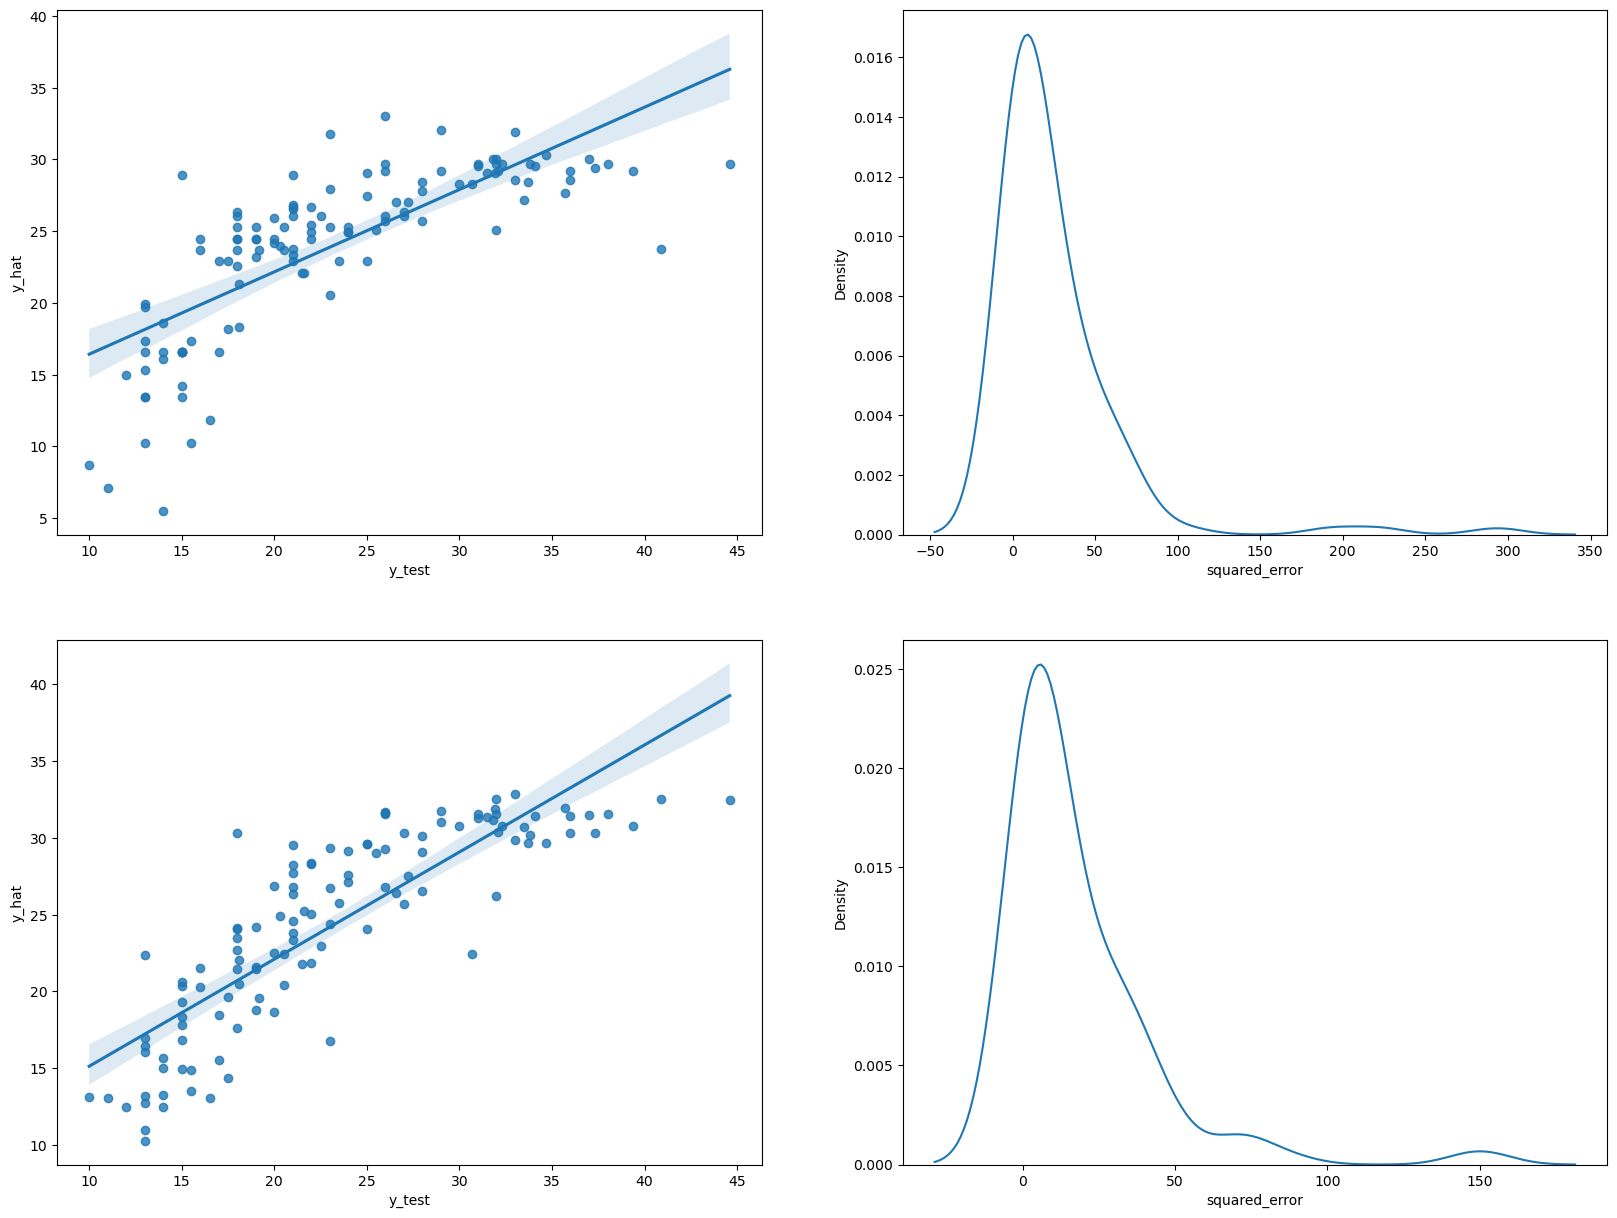

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
sns.regplot(x='y_test', y='y_hat', data=test_preds_horsepower, ax=axes[0, 0])
sns.kdeplot(x='squared_error', data=test_preds_horsepower, ax=axes[0, 1])

sns.regplot(x='y_test', y='y_hat', data=test_preds_weight, ax=axes[1, 0])
sns.kdeplot(x='squared_error', data=test_preds_weight, ax=axes[1, 1])